In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data  = pd.read_csv("/content/HR_comma_sep.csv")

In [42]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [44]:
data['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [45]:
data  = data.rename(columns = {'sales':'dept'})

In [46]:
data.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

<Axes: xlabel='left'>

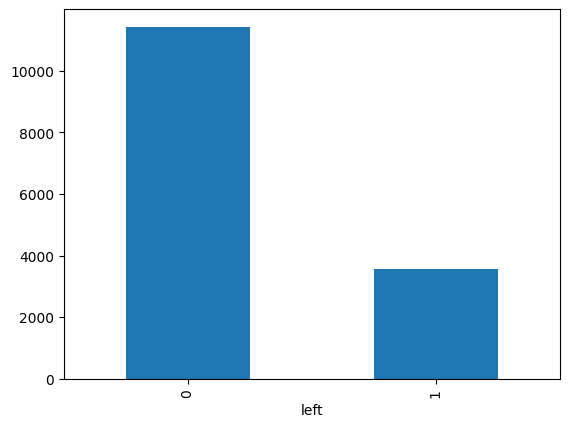

In [47]:
data.left.value_counts().plot(kind = 'bar')

<Axes: xlabel='dept'>

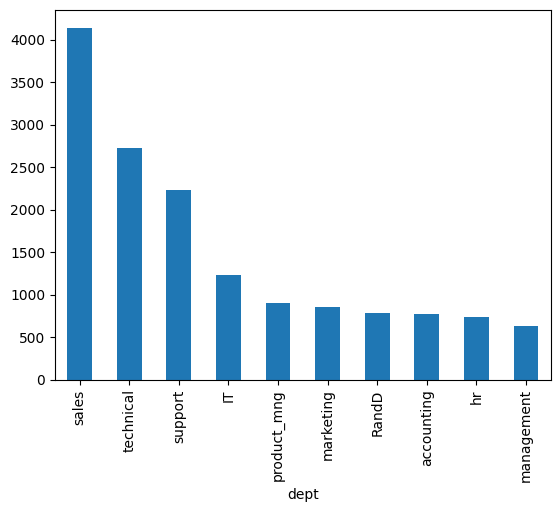

In [48]:
data.dept.value_counts().plot(kind = 'bar')

<Axes: xlabel='dept', ylabel='count'>

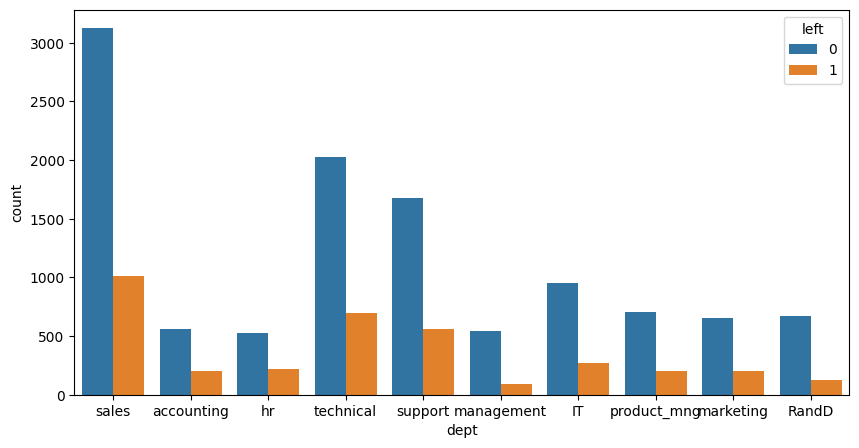

In [49]:
plt.figure(figsize = (10,5))
sns.countplot(data = data, x = 'dept', hue = "left")

<Axes: xlabel='time_spend_company'>

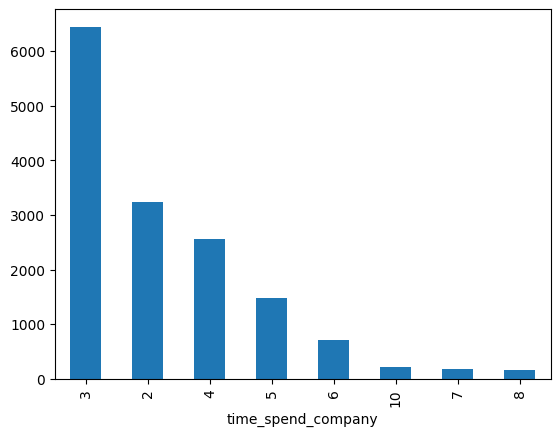

In [50]:
data.time_spend_company.value_counts().plot(kind = 'bar')

<Axes: xlabel='time_spend_company', ylabel='count'>

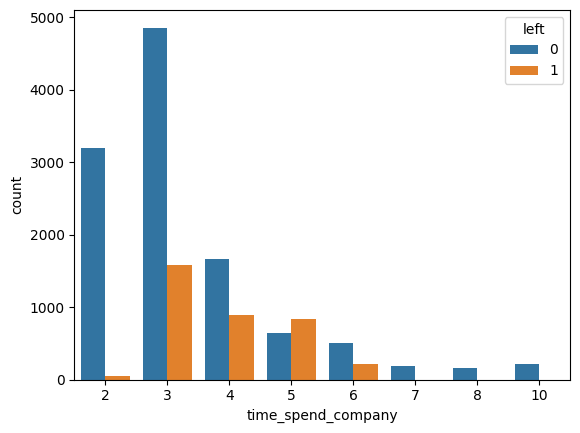

In [51]:
sns.countplot(data , x = 'time_spend_company', hue = 'left')

In [52]:
data.salary.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

<Axes: xlabel='salary', ylabel='count'>

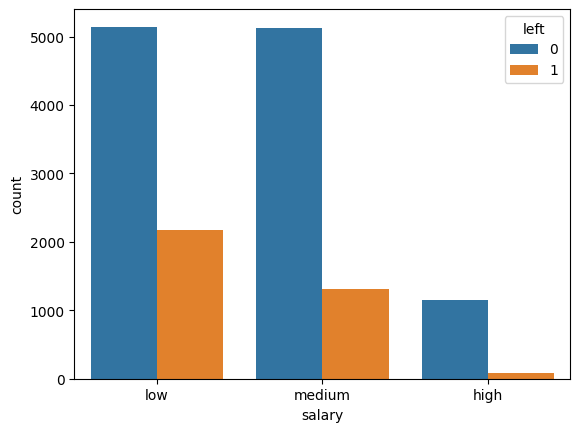

In [53]:
sns.countplot(data,x = "salary",hue = 'left')

In [54]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [55]:
from sklearn.preprocessing import OneHotEncoder
encoded_df = pd.get_dummies(data.dept)

In [57]:
data = pd.concat([data,encoded_df],axis =1)

In [59]:
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}

# Apply mapping to create 'salary_encoded' column
data['salary_encoded'] = data['salary'].map(salary_mapping)

In [63]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,...,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,False,False,False,False,False,False,True,False,False,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,False,False,False,False,False,False,True,False,False,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,False,False,False,False,False,False,True,False,False,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,False,False,False,False,False,False,True,False,False,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,False,False,False,False,False,False,True,False,False,0


In [67]:
data.shape

(14999, 21)

In [64]:
x = data.drop(['dept','salary','left'],axis = 1)

In [68]:
x.shape

(14999, 18)

In [69]:
y = data.left

In [81]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size  = 0.50)

# VOTING ENSEMBLE

In [77]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [79]:
clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = DecisionTreeClassifier(random_state=42)
clf4 = SVC(C = 10,kernel = "rbf")

In [80]:
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('knn', clf2), ('dt', clf3)],
    voting='soft')

In [83]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [85]:
y_pred = voting_clf.predict(x_test[:1000])

In [87]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test[:1000], y_pred)
accuracy

0.987

## INDIVIDUAL ALGO


In [88]:
clf1.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [89]:
y_pred_LR = clf1.predict(x_test[:1000])
accuracy_LR = accuracy_score(y_test[:1000], y_pred_LR)
accuracy_LR

0.795

In [92]:
clf2.fit(x_train,y_train)
y_pred_KNN = clf2.predict(x_test[:1000])
accuracy_KNN = accuracy_score(y_test[:1000], y_pred_KNN)
accuracy_KNN

0.943

In [93]:
clf3.fit(x_train,y_train)
y_pred_DT = clf3.predict(x_test[:1000])
accuracy_DT = accuracy_score(y_test[:1000],y_pred_DT)
accuracy_DT

0.984

# Bagging - Bootstrapping Aggregation

In [94]:
from sklearn.ensemble import BaggingClassifier

In [95]:
base_clf = DecisionTreeClassifier(random_state=42)

In [100]:
bagging_clf_20 = BaggingClassifier(base_estimator=base_clf, n_estimators=20, random_state=42)

In [101]:
bagging_clf_50 = BaggingClassifier(base_estimator=base_clf, n_estimators=50, random_state=42)

In [102]:
bagging_clf_70 = BaggingClassifier(base_estimator=base_clf, n_estimators=70, random_state=42)

In [103]:
bagging_clf_100 = BaggingClassifier(base_estimator=base_clf, n_estimators=100, random_state=42)


In [106]:
bagging_clf_20.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=20, random_state=42)

In [107]:
bagging_clf_50.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=50, random_state=42)

In [108]:
bagging_clf_70.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=70, random_state=42)

In [109]:
bagging_clf_100.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, random_state=42)

In [110]:
y_pred_20 = bagging_clf_20.predict(x_test[:1000])

In [111]:
y_pred_50 = bagging_clf_50.predict(x_test[:1000])

In [112]:
y_pred_70 = bagging_clf_70.predict(x_test[:1000])

In [113]:
y_pred_100 = bagging_clf_100.predict(x_test[:1000])

In [114]:
accuracy_20 = accuracy_score(y_test[:1000], y_pred_20)
accuracy_50 = accuracy_score(y_test[:1000], y_pred_50)
accuracy_70 = accuracy_score(y_test[:1000], y_pred_70)
accuracy_100 = accuracy_score(y_test[:1000], y_pred_100)

In [116]:
for i in [20,50,70,100]:
  print(f'accuracy_{i}')

accuracy_20
accuracy_50
accuracy_70
accuracy_100


In [118]:
print(accuracy_20)
print(accuracy_50)
print(accuracy_70)
print(accuracy_100)

0.994
0.993
0.992
0.993


In [119]:
base_clf_SVC = SVC()

In [123]:
bagging_clf_SVC = BaggingClassifier(base_estimator=base_clf_SVC, n_estimators=20, random_state=42)

In [124]:
bagging_clf_SVC.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=42)

In [125]:
y_pred_SVC = bagging_clf_SVC.predict(x_test[:1000])

In [128]:
accuracy_SVC_bagging = accuracy_score(y_test[:1000],y_pred_SVC)
accuracy_SVC_bagging

0.767

In [129]:
bagging_clf_SVC_50 = BaggingClassifier(base_estimator=base_clf_SVC, n_estimators=50, random_state=42)

In [130]:
bagging_clf_SVC_50.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=42)

In [133]:
y_pred_SVC_50 = bagging_clf_SVC_50.predict(x_test[:1000])

In [134]:
accuracy_SVC_bagging = accuracy_score(y_test[:1000],y_pred_SVC_50)
accuracy_SVC_bagging

0.767